# Random Forest Overview

https://www.datacamp.com/tutorial/random-forests-classifier-python

* A random forest is a set of randomly constructed decision trees
* Each decision tree is constructed from an independent random sample of training data.
* In the case of <u>classification</u>, we allow each decision tree to classify individually, and then vote for that classification. The most popular classification is the final output.
* In the case of <u>regression</u>, we allow each decision tree to output its own prediction, and then output the average of these predictions.

PROS
* Since this is a random <u>forest</u> of many decision trees, the model is less sensitive to bias (e.g. over-fitting)
* The random forest model can be used in classification <u>and</u> regression, we just have to change between voting and averaging
* We can use relative feature importance (feature = exogenous variable) to drop less-contributing features, thereby increasing accuracy

CONS
* Since we have hundreds of decision trees, each predicting individually and then voting/averaging all together, the model can be slow
* It is hard to transform our model into a clear set of rules for classification, since we have hundreds of decision trees (rather than one decision tree that can be easily interpreted)

* Random Forest is an example of an <u>ensemble</u> algorithm: an algorithm that combines multiple models (each decision tree)
* There are two methods of ensemble - <u>bagging</u> and <u>boosting</u>. Random Forest uses bagging
    * <u>Bagging</u>: create different training subsets from sample training data (with replacement), final prediction/classification comes from voting
    * <u>Boosting</u>: a sequential model that combines weak learners to create a strong learner - the final model is the most accurate

## Bagging / Bootstrap Aggregation

1. We begin with the original training data
2. We randomly sample with replacement from the original training data to create multiple training subsets, each yields a model - <u>Bootstrapping</u>
3. Each training subset is used to create and train a decision tree - <u>Aggregation</u>
4. We then vote/average the results of each decision tree using test data to create the final output - <u>Ensemble Classifier</u>

## Hyperparameters

Increase Predictive Power
1. $n_{estimators}$ = number of trees in the random forest
2. $max_{features}$ = max number of exogenous variables considered when splitting a node in each decision tree
3. $min_{sample-leaf}$ = minimum number of leaves required to split an internal node

Increase Speed
1. $n_{jobs}$ = how many processors the engine is allowed to use. If -1, there is no limit
2. $random_{state}$ = controls randomness of the sampling process. Given all other parameters/dataset is the same, the model will produce identical results if the same $random_{state}$ is used
3. $oob_{score}$ = *Out of the Bag*; one-third of the sample not used to train, but instead to test the model's performance

# Creating each Decision Tree

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

*Indeed, the easy way to implement a random forest algorithm is to import the RandomForestClassifier or RandomForestRegressor from the scikit-learn library in Python. This abstracts the process of creating each individual decision tree.*

*That being said, let's make the decision trees ourselves. Who doesn't like a challenge...*

So, how does each tree look? Below is a simple example from the titanic dataset

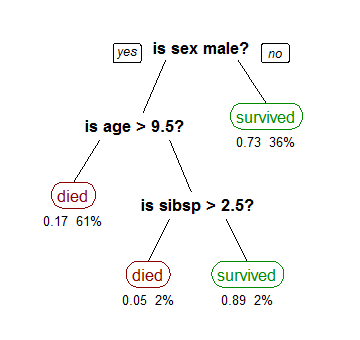

In [2]:
from IPython.display import Image
Image(filename='./pictures/1_XMId5sJqPtm8-RIwVVz2tg.png')

At each node, we have a feature/exogenous variables: *sex, age, number of siblings/spouses*. Some of these features are discrete (sex) and others continuous (age, sibsp). Depending on the value, we traverse to the next node (internal or leaf) along the corresponding edge. The classification/prediction that the tree outputs is dependent on the leaf node that we arrive at.

*That being said, how do we know which features to use as well as the conditions for traversing an edge?*

## Recursive Binary Splitting - A Greedy Algorithm

We begin by including all features (exogenous variables) in the decision tree and use various conditions to split each node. We then test these split conditions using a cost function. The split conditions that yield the lowest cost are used in the final tree.

Assume there are $k$ features to select from. Therefore, at the root node, we have $k$ options for the feature used to split. We calculate the accuracy cost (using the cost function) for each of the $k$ options, and select the feature with the lowest cost. This is the feature used to split at the root node.

We recursively repeat this for each branch in the tree.

Because the feature at the root node yielded the lowest cost, the first feature in the tree is the best predictor/classifier in the dataset.

## The Cost Function

In the case of <u>Regression</u>: $$Cost = \sum{(y - \hat{y})^2}$$ where y is the true value and $\hat{y}$ is the prediction. 

An alternative cost function that can be used focuses on minimizing the standard deviation, rather than the squared error.

In the case of <u>Classification</u>: $$G = \sum{pk(1-pk)}$$

$G$ is the gini score of splitting by a certain feature. $pk$ is the proportion of same class inputs within a group, $0 \leq pk \leq 1$

Say we split by sibsp in the root node. Since sibsp is not as good of a classifier as sex, the proportion of same class inputs will be closer to 0.5. In other words, if we split by sibsp first, the proportion of 'died' vs. 'survived' in the left and right branch will be close to 50/50.

Now, assume we split by sex first. Since sex is a better classifier, each branch will have a higher proportion of same-class inputs. In other words, the 'male' branch will have a high proportion of 'died' output and the 'female' branch will have a low proportion of 'died' output.

To be mathematical, as $pk$ --> 0 or 1, G --> 0. Moreover, $pk$ --> 0 or 1 if a better classifier is selected (because there will be a higher or lower proportion of the same class, not a 50/50 split). If the classifier is bad, then $pk$ --> 0.5 (50/50 split of 'died' vs. 'survived').

Therefore, a lower gini score indicates a better classifier.

## Pruning

<u>Pruning</u> is the removal of branches that are split based on features with low importance. By doing this, we reduce the height of the tree without sacrificing a good classification feature.

One method of pruning is <u>Reduced Error Pruning</u>: 
* We begin at the lowest level internal nodes (nodes that have an associated feature) and work our way up
* For each node, we remove the subtree below it, thus making the node a leaf node. This new leaf node is assigned whatever was the most popular class at that node 
* If the removal of a node's subtree (and re-assignment of the node as a leaf node) does not hurt the performance of the overall tree, the node is pruned.

Another method of pruning is *Cost Complexity Pruning*, which uses a learning parameter ($\alpha$) to determine if a node can be removed based on the size of its sub-tree.

# Decision Tree to Random Forest

Once we are able to construct a decision tree, we randomly sample from the training data (as was described earlier) and construct a decision tree with each strata. Then, all that is left to do is to let each decision tree classify/predict and vote/average. 